In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 

import ClassCOMPAS     as CC ###


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [7]:
print(BPSnameslist)

['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']


In [8]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_GSMF, GSMF in enumerate(GSMFs):
    ind_y = ind_GSMF + 1
    for ind_MZ, MZ in enumerate(MZs):
        ind_z = ind_MZ +1
        for ind_SFR, SFR in enumerate(SFRs):
            ind_x = ind_SFR+1
            
            
            
            
        

            MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))

print(MSSFRnameslist)
MSSFRnameslistWantedOrder = []
MSSFRnameslistWantedOrder.append('000') # add phenomenological 

for ind_GSMF, GSMF in enumerate([0,1,2]):
    ind_x = ind_GSMF + 1
    for ind_MZ, MZ in enumerate([0,1,2]):
        ind_y = ind_MZ +1
        for ind_SFR, SFR in enumerate([0,1,2]):
            ind_z = ind_SFR+1
            
            
            
            
        

            MSSFRnameslistWantedOrder.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
            
print(MSSFRnameslistWantedOrder)


indexlist = np.asarray(range(28))
print(indexlist)
indexOrderedToOldMSSFR = []
for mssfr in MSSFRnameslistWantedOrder:
    mask = (np.asarray(MSSFRnameslist)==mssfr)
    ind_map = indexlist[mask]
    indexOrderedToOldMSSFR.append(int(ind_map[...].squeeze()))
    
    
print(indexOrderedToOldMSSFR)



dictOldmssfrINDtoNEWmssfrIND = {MSSFRnameslist[i]: indexOrderedToOldMSSFR[i] for i in range(len(MSSFRnameslist))}

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
['000', '111', '112', '113', '121', '122', '123', '131', '132', '133', '211', '212', '213', '221', '222', '223', '231', '232', '233', '311', '312', '313', '321', '322', '323', '331', '332', '333']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[0, 1, 4, 7, 10, 13, 16, 19, 22, 25, 2, 5, 8, 11, 14, 17, 20, 23, 26, 3, 6, 9, 12, 15, 18, 21, 24, 27]


In [51]:

physicalNamesBPSmodelsWithEnter = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable}' + '\n'+ r'\textbf{case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic}' +'\n' + r'\textbf{CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}$' +'\n' + r'$0\,\rm{km}\,\rm{s}^{-1}$' , r'$\rm{f}_{\rm{WR}} = 0.1$', r'$\rm{f}_{\rm{WR}} = 5$']

alphabetPhysicalNameDictWithEnter =  {BPSnameslist[i]: physicalNamesBPSmodelsWithEnter[i] for i in range(len(BPSnameslist))}





def makeKDEfigure(axe_ind=None, xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=['000'], DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
                              xlim=[1,30], ylim=[0, None], whichWeight='det', path_dir='/Volumes/Andromeda/DATA/AllDCO_bugfix/', quantiles=False,\
                  pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'):
    
    
    """ 
    plot total mass distribution with channels 
    input:
    
    axe = the axis to plot it on
    xvar= the array of data that you want to plot the kde of
    bw_method = bandwith method of the kernel density function you want to use (see class gaussian_kde())
    xvarrange, the x-axis range to use for the kde [should be typically slightly larger than the range of xvar]
    xlabel, ylabel = x and y labels of the plot
    xlim, ylim = xlim and ylim of the plot axis 
    """
    
    # constants
    Zsolar=0.0142
    lw = 2

    # start of min and max quantiles. 

    
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
 

    DCOname_dict = {'BHNS':'BHNS', 'BBH':'BHBH', 'BNS':'NSNS'}
    DCOname = DCOname_dict[DCOtype]
#     xvarHeaders = ['Mass1', 'Mass2', 'tc',\
#                'log10(tc)', 'TotMass', 'ChirpMass', 'q', 'metallicitySystems', 'log10metallicitySystems', 'tdelay',\
#                'log10(tdelay)']
    xvar_dict = {'Mtot':4,'Mass1':0, 'Mass2':1, 'q':6, 'Mchirp':5, 'logZ':8, 'Z':7, 'tc':2, 'log10(tc)':3, 'tdelay':9, 'log10(tdelay)':10 }

        


#     for ind_m, BPSmodelName in enumerate(BPSmodelNames[0:2]):
    for ind_m, BPSmodelName in enumerate(BPSmodelNames):
        minq0_05 = 100
        maxq0_95 = -100
        
        axe = ax[ind_m+1,axe_ind]
        
        
        
        if ind_m==0:
            print('now at m=', BPSmodelName)

        
        # distribution quantiles/percentiles:
        dfname =  pathQuantiles + 'distribution_percentiles_model_' + DCOtype  + '_' + BPSmodelName + '.csv' 
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])
        

        # data for KDE / PDF:
        path_ = path_dir + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'   

        fdata = h5.File(path)

            
            
        if xparam in ['Mass1', 'Mass2', 'q', 'Mchirp', 'Mtot']:

            # obtain BH and NS masses
            xvar1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
            xvar2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
            M1, M2 = obtainM1BHandM2BHassymetric(m1=xvar1, m2=xvar2) # M1 will be the most massive, M2 the least massive compact object. 
            del xvar1
            del xvar2
            if xparam =='Mtot':
                xvar=M1+M2
            elif xparam=='Mass1':
                xvar = M1
            elif xparam=='Mass2':
                xvar = M2 
            elif xparam =='q':
                xvar = M1/M2
            elif xparam=='Mchirp':
                xvar = chirpmass(M1,M2)

            del M1
            del M2


        elif xparam=='logZ':
            ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
            xvar = np.log10((ZZ))
            del ZZ 
            
        elif xparam=='Z':
            ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
            xvar = ((ZZ))
            del ZZ

            
        elif xparam=='tc':
            tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
            xvar = tc / 1000. # in Gyr. 
            del tc

        elif xparam=='tdelay':
            tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
            tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
            xvar = (tc/1000) + (tform / 1000) # in Gyr 
            del tc 
            del tform
        else:
            print('KeyError')
        
        # index in the quantiles.csv file of the parameter
        xvarind = xvar_dict[xparam]
        ind_max = 28 + xvarind*28
        ind_min = xvarind*28
        
        label = None


        BPScolor = colorDirDict[BPSmodelName]
            
            
        ymax=0
        ii=0
        print(MSSFRmodelNames)
        for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):
            # read in MSSFR weights: 
            if whichWeight=='det':
                # get detected weights
                fparam_key = 'weights_detected'
            elif whichWeight=='z0':
                # get intrinsic weights
                fparam_key = 'weights_intrinsic'

            weightheader = 'w_' + mssfr
            w = fdata[fparam_key][weightheader][...].squeeze()

            # highlight the SFRD if they are one of the following 3
            if mssfr in ['000', '231', '312']:
                MSSFRalpha=1
                if mssfr=='000':
                    MSSFRzorder = 57
                    MSSFRlinestyle = MSSFRlinestyles[0]                    
                elif mssfr=='231':
                    MSSFRzorder=55
                    MSSFRlinestyle = MSSFRlinestyles[1]
                elif mssfr=='312':
                    MSSFRzorder=54
                    MSSFRlinestyle = MSSFRlinestyles[2]
            else:
                MSSFRalpha=0.5
                MSSFRlinestyle = '-'
                MSSFRzorder=51   
                
            BPScolor = colorDirDict[BPSmodelName]



    
    
            # make the KDE, by calculating KDE values for the following x points 
            xx_boot = np.linspace(xvarrange[0],xvarrange[1],100)

#             # set bandwidth (dimensionless) based on the no of samples in the data. 
            lenXvar = len(xvar)
            if lenXvar<=100000:
                bw=0.1
            elif lenXvar>2*10**6:
                bw = 0.04
            elif (lenXvar<=2*10**6) & (lenXvar>10**6):
                bw = 0.04
            elif (lenXvar<=10**6) & (lenXvar>5*10**5):
                bw = 0.05 
            elif (lenXvar<=5*10**5) & (lenXvar>10**5):
                bw = 0.06
            else:
                print('error!! bw not defined')
#             bw = 4# TEMP 
            
            # for metallicity we want a seperate, larger KDE bandwidth, since here the resolution is limited by our no of Zi grid points
            if xparam=='logZ':
                bw = 0.1
            if (mssfr=='000')&(axe_ind==0):
                print('Model ', BPSmodelName, 'with %s DCOs is given a kde bandwidth of '%len(xvar),  'bw=', bw)
                
            KDE = gaussian_kde(xvar, weights=w, bw_method=bw)
            yy_boot = KDE(xx_boot)
            del KDE 

            axe.plot(xx_boot, yy_boot, alpha=MSSFRalpha, color=BPScolor, zorder=MSSFRzorder, label=None,\
                     linewidth=lw, linestyle=MSSFRlinestyle ) 

            ymax = np.max(np.asarray([ymax,np.max(yy_boot)]))
            ylim[1]=ymax*1.05 
            
            
            
            q0_05 = (df.iloc[1][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[mssfr]]
            q0_5 = (df.iloc[4][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[mssfr]]
            q0_95 = (df.iloc[7][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[mssfr]]
            

            minq0_05 = np.min([minq0_05, q0_05])
            maxq0_95 = np.max([maxq0_95, q0_95])

            


                
        fdata.close()
#         # if at the last one, do the overall gray areas for max & min quantiles
#         if (quantiles==True): 
#             print('bpsnms = ', BPSmodelNames)
#             xx = np.linspace(ylim[0], ylim[1]*100, 2)
#             for ind_, bps in enumerate(BPSmodelNames):
#                 ax[axe_ind,ind_].fill_between([xlim[0], minq0_05],  y1=[0,0], y2=[ylim[1], ylim[1]],   color='lightgray', zorder=0 , alpha =0.25 )
#                 ax[axe_ind,ind_].fill_between([maxq0_95, xlim[1]] ,  y1=[0,0], y2=[ylim[1], ylim[1]],   color='lightgray', zorder=0 , alpha =0.25 )
        
    
        if quantiles==True:
            for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):    
                # plot median with scatter point 
                q0_5 = (df.iloc[4][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[mssfr]]
                if quantiles==True:
                    axe.scatter(q0_5, 0.50*ylim[1],  \
                                c='gray', s=30, label=None, \
                                marker='|', zorder=500)  
                    # quantiles per BPS model 
    
        if quantiles==True:
#             xx = np.linspace(ylim[0], ylim[1]*100, 2)
#             for ind_, bps in enumerate(BPSmodelNames):
            axe.fill_between([xlim[0]-100, minq0_05],  y1=[0,0], y2=[ylim[1]*10, ylim[1]*10],   color='lightgray', zorder=0 , alpha =0.25 )
            axe.fill_between([maxq0_95, xlim[1]+100] ,  y1=[0,0], y2=[ylim[1]*10, ylim[1]*10],   color='lightgray', zorder=0 , alpha =0.25 )

                
    
        del xvar
        del w

        
        
        
        
        ax2y = axe.twinx()
        ax2y.set_ylim(ylim[0], ylim[1])
        # add label of model on the most left panels 
        if xparam=='logZ':
            center_x = (ylim[0] + (ylim[1]-ylim[0])/2)
            ax2y.set_yticks([center_x])
            ax2y.set_yticklabels([alphabetPhysicalNameDictWithEnter[BPSmodelName]], fontsize=fs-7, rotation=90, va='center') #rotation=55,
        else: 
            ax2y.set_yticks([])
            for tick in ax2y.yaxis.get_major_ticks():
                tick.label.set_fontsize(0.1) 
                
                
                
        ###########
        fsyticks = 15
        if xlim:
            axe.set_xlim(xlim[0], xlim[1])
        if ylim:
            axe.set_ylim(ylim[0], ylim[1])
        
        
        # add label of param plotted to bottom of panels # in ['Q']
        if BPSmodelName==BPSmodelNames[-1]: 
            axe.set_xlabel(ylabel, fontsize=fs)
            axe.tick_params(labelsize=fsyticks)
            
        else:
            axe.set_xticklabels( () )
            axe.set_xticks([])

        axe.set_yticks([])
        axe.set_yticklabels( () )



#         ########################
#         # SECOND Y-AXIS 
#         # add label of xparam and range on top on second axis 
#         ax2x = axe.twiny()
#         if BPSmodelName=='A':
#             ax2x.set_xlim(xlim[0], xlim[1])
#             ax2x.set_xlabel(ylabel, fontsize=fs)
#             ax2x.tick_params(labelsize=fsyticks)
#         else:
#             ax2x.set_xticklabels( () )
#             ax2x.set_xticks([])




    #################
    
        # add label of BPS model on extra axis on the right 
        if xparam=='Mass1':
            center_x = (ylim[0] + (ylim[1]-ylim[0])/2)

            axe.set_yticks([center_x])
            axe.set_yticklabels([BPSmodelName],  fontsize=fs) #rotation=55,

            
            
            
            
    ############################
    ##### ADD OBSERVATIONS  ####
    ############################
    axe = ax[0, axe_ind]
    ########################
    # SECOND Y-AXIS 
    # add label of xparam and range on top on second axis 
    ax2x = axe.twiny()
#     if BPSmodelName=='A':
    ax2x.set_xlim(xlim[0], xlim[1])
    ax2x.set_xlabel(ylabel, fontsize=fs)
    ax2x.tick_params(labelsize=fsyticks)
    layoutAxesNoXlabel(ax=ax2x)
#     layoutAxesNoXlabel
#     else:
#         ax2x.set_xticklabels( () )
#         ax2x.set_xticks([])    

        
    #######################
    # Plot GWTC data 
    
    
    # SHOW GWTC-1 and GWTC-2 results:
    if xvarind in [0,1,4,5,6]:

        if xvarind==0:
            ind_GWTC = 0 # M1 [Msun]
        elif xvarind==1:
            ind_GWTC = 1 # M2 [Msun]
        elif xvarind==4:
            ind_GWTC = 2 # Mtot [Msun]
        elif xvarind==5:
            ind_GWTC = 3 # Mchirp [Msun]
        elif xvarind==6:
            ind_GWTC = 4 # mass ratio q

        
        
#         if DCOtype in ['BHBH', 'BHNS']:

        
        if DCOtype=='BHNS':
            color_GW_err = ['#fc8d62', '#8da0cb', '#66c2a5']
            color_GW_sct = ['#fc8d62', '#8da0cb', '#66c2a5']
            dxloc_GW = [-0.4, -0.1, +0.25]
            GWsGWTC = ['GW190425', 'GW190814', 'GW190426_152155']
            GWnames = ['GW190425', 'GW190814', 'GW190426']  
            
#         TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
#         TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
                    
        elif DCOname=='NSNS':
            color_GW_err = ['#fc8d62', '#fc8d62', '#fc8d62']
            color_GW_sct = ['#fc8d62', '#fc8d62', '#fc8d62']
            dxloc_GW = [-0.3, +0.1]
            GWsGWTC  = ['GW170817', 'GW190425']
            GWnames = ['GW170817', 'GW190425']
            
        elif DCOname=='BHBH':

            BBHsGWTC1 = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170818', 'GW170823']
            BBHsGWTC2 = ['GW190408_181802','GW190412','GW190413_052954','GW190413_134308','GW190421_213856',\
            'GW190424_180648','GW190503_185404','GW190512_180714',\
            'GW190513_205428','GW190514_065416','GW190517_055101','GW190519_153544','GW190521_074359',\
            'GW190521','GW190527_092055','GW190602_175927','GW190620_030421','GW190630_185205','GW190701_203306',\
            'GW190706_222641','GW190707_093326','GW190708_232457','GW190720_000836',\
            'GW190727_060333','GW190728_064510','GW190731_140936','GW190803_022701','GW190828_063405',\
            'GW190828_065509','GW190910_112807','GW190915_235702','GW190924_021846','GW190929_012149',\
             'GW190930_133541']            
            GWsGWTC  = np.concatenate((BBHsGWTC1, BBHsGWTC2))
            print('#BHBH =', len(GWsGWTC))
            color_GW_err = ['#66c2a5']*len(GWsGWTC)
            color_GW_sct = ['#66c2a5']*len(GWsGWTC)
            dxloc_GW = np.linspace(-0.45, 0.45, len(GWsGWTC))
            GWnames = False
            

        for ind_GW, GW_ in enumerate(GWsGWTC):
            #        
#             pathGWTC = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/GWTC_data/'
            pathGWTC = '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/'
            dfname = pathGWTC + 'CredibleIntervals_' + GW_  + '.csv' 
            df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])


            q0_05 = (df.iloc[0][ind_GWTC])
            q0_5 = (df.iloc[1][ind_GWTC])
            q0_95 = (df.iloc[2][ind_GWTC])


            yplus0_9 = q0_95 -q0_5
            ymin0_9  = q0_5-q0_05
            xxx=0
            print(GW_, ' = ', q0_5 , '+/-', yplus0_9, ymin0_9 )
            
            # plot for BHNS and NSNS only the median with 90% confidence interval as errorbars
            
            erb = axe.errorbar(y=xxx+0.5+dxloc_GW[ind_GW], x=q0_5, xerr=np.transpose([[ymin0_9, yplus0_9]]), fmt='o', capsize=5, ecolor=color_GW_err[ind_GW], ms=5,  mec=color_GW_sct[ind_GW], mfc=color_GW_sct[ind_GW], zorder=1E6)

            if DCOtype=='BHNS':
                erb[-1][0].set_linestyle('-.')
            # only add text if BHNS or NSNS
            if DCOname in ['BHNS', 'NSNS']:
                # only add text in the first panel 
                if xvarind==0:
                    if (GW_=='GW190425') & (DCOname!='NSNS'):
                        xtext = q0_5 + 5.1
                    elif GW_=='GW190814':
                        xtext = q0_5 -.25
                    else:
                        xtext = q0_5 -0.05

                    axe.text(y=xxx+0.54+dxloc_GW[ind_GW], x=xtext, s=GWnames[ind_GW], color=color_GW_err[ind_GW], ha='center', va='bottom', rotation=0, zorder=1E7, fontsize=15)

    axe.set_yticks([])
    axe.set_yticklabels( () )    
    axe.set_xlim(xlim[0], xlim[1])
    axe.set_ylim(0,1)
    

    if xparam=='Mass1':
        center_x = 0.5

        axe.set_yticks([center_x])
        axe.set_yticklabels(['   GWTC'],  fontsize=fs, rotation=90) #rotation=55,    
    
    
    return 0,0 






# BHNS 

In [ ]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'






ncols, nrows= 7,17
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


# for ind_bps, BPS in enumerate(['A']):#, 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']):
# Zsolar=0.0142

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']


# MSSFRnameslist = ['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
# without z=1 SFRD models:
# MSSFRnameslist = ['000']#, '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
MSSFRnameslist = ['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']



TYPE = 'BHNS'
# nModels=15
# BPSnameslist = list(string.ascii_uppercase)[0:nModels]
# BPScolors       = sns.color_palette("husl", len(BPSnameslist))
# colorDirDict =  {BPSnameslist[i]: BPScolors[i] for i in range(len(BPSnameslist))}

# I do NOT want model E 
if 'E' in BPSnameslist:
    BPSnameslist.remove('E')
print(BPSnameslist)





handles, labels = None, None
# BPSlist = [BPS]
whichWeight='det'

nameX = r'  a'
nameY = r' $m_{\rm{BH}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='Mass1'
_,_=makeKDEfigure(axe_ind=0,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.2,27.5], xlabel=nameX, ylabel=nameY, \
                                          xlim=[1.02,29.999], ylim=[0.0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)#, whichBPScolor=whichBPScolor) 

nameX = r'$-  $'
nameY = r' $m_{\rm{NS}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='Mass2'
_,_=makeKDEfigure(axe_ind=1,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,3], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,3.], ylim=[0.,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)#, whichBPScolor=whichBPScolor)     

#     nameX = r'${\rm{d}}P / {\rm{d}}  m_{\rm{tot}}  $'
nameY = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mtot'
_,_=makeKDEfigure(axe_ind=2,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.2,28], xlabel=nameX, ylabel=nameY, \
                              xlim=[2.501,27.9999], ylim=[0.0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)#, whichBPScolor=whichBPScolor, quantiles=True) 


#     nameX = r'${\rm{d}}P / {\rm{d}} {M}_{\rm{c}}  $'
nameY = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mchirp'
_,_=makeKDEfigure(axe_ind=3, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 7], xlabel=nameX, ylabel=nameY, \
                              xlim=[1.01,6.999], ylim=[0.0,None],  whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 


#     nameX = r'${\rm{d}}P / {\rm{d}} q  $'
nameY = r' $q$ $ \, $'
xparam='q'
_,_=makeKDEfigure(axe_ind=4, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,15], xlabel=nameX, ylabel=nameY, \
                              xlim=[1.00,14.999], ylim=[0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)     


nameY = r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
xparam='tdelay'
_,_=makeKDEfigure(axe_ind=5, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0,14.7], xlabel=nameX, ylabel=nameY, \
                              xlim=[0,14.99], ylim=[0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)      





nameY = r' $\log_{10}(Z_{\rm{i}})$ $ \, $'
xparam='logZ'
xmin = np.log10(0.0001)
xmax = np.log10(0.0499)
_,_=makeKDEfigure(axe_ind=6,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[xmin-0.5,xmax], xlabel=nameX, ylabel=nameY, \
                              xlim=[xmin,xmax], ylim=[0.001,None],  whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig('./KDEplot_' + whichWeight +'_'  + TYPE+ '3.png', transparent=False)
plt.show()
plt.close()










['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
now at m= A
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
Model  A with 1525553 DCOs is given a kde bandwidth of  bw= 0.04
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
Model  B with 738537 DCOs is given a kde bandwidth of  bw= 0.05
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
Model  C with 148043 DCOs is given a kde bandwidth of  bw= 0.06
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
Model  D with 118921 DCOs is given a kde bandwidth of  bw= 0.06
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '

['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222'

# NSNS 

['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
now at m= A
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
Model  A with 233137 DCOs is given a kde bandwidth of  bw= 0.06
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
Model  B with 41984 DCOs is given a kde bandwidth of  bw= 0.1
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
Model  C with 45070 DCOs is given a kde bandwidth of  bw= 0.1
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
Model  D with 292349 DCOs is given a kde bandwidth of  bw= 0.06
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133',

['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222'

['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']


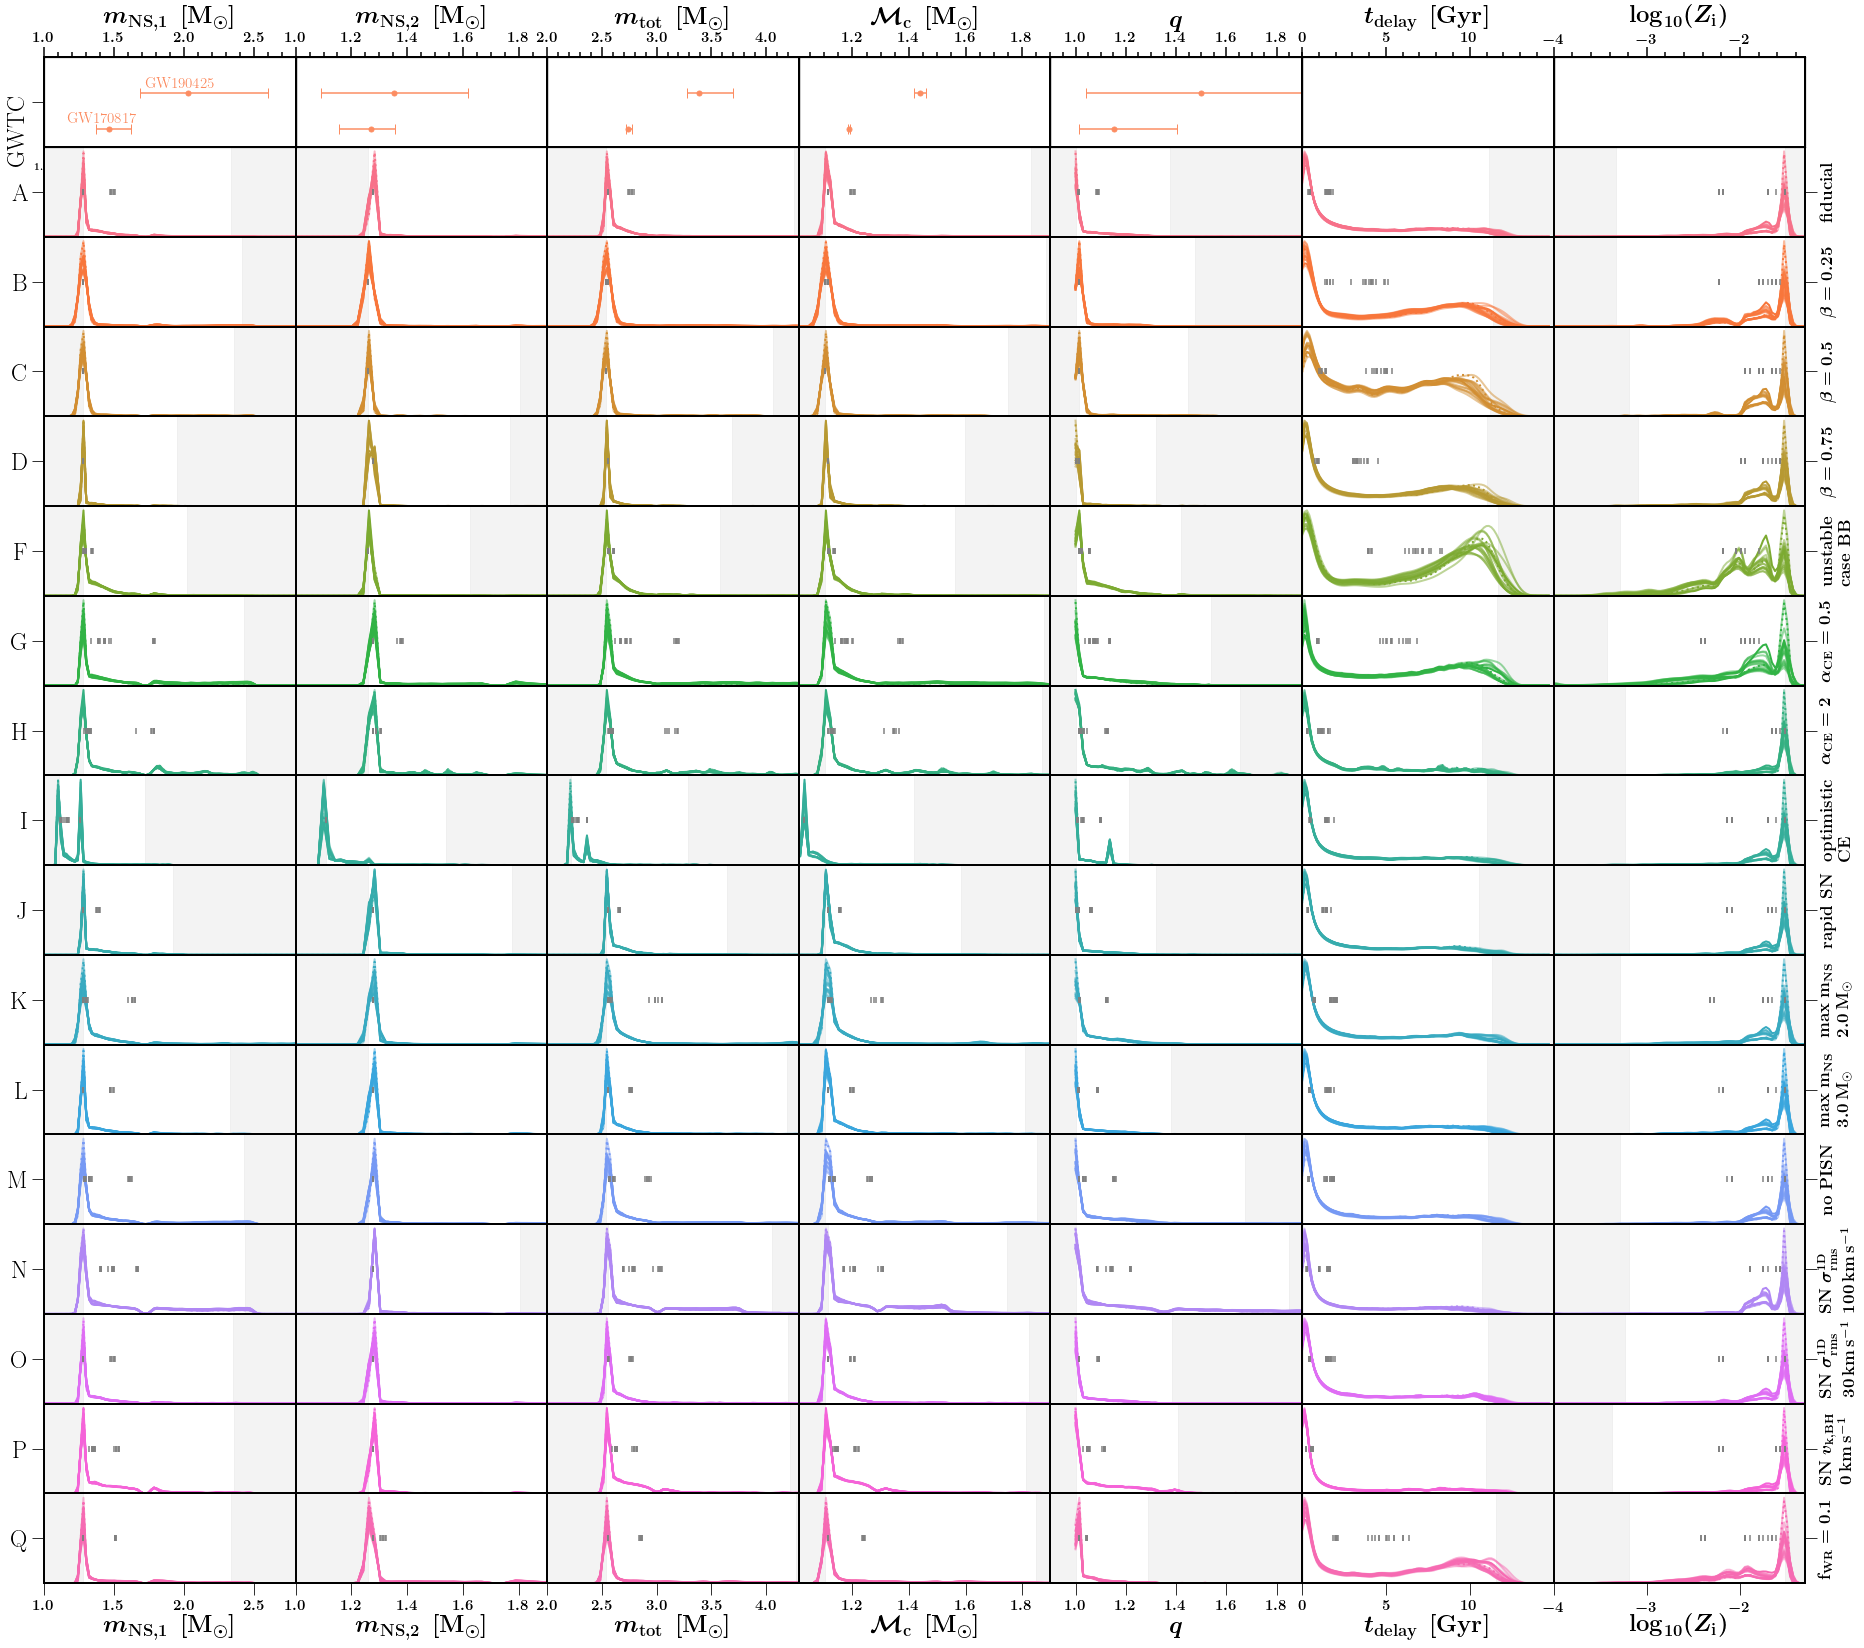

In [43]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'



ncols, nrows= 7,17
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})




MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']


# without z=1 SFRD models:
MSSFRnameslist = ['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']



TYPE = 'BNS'
nModels=17
BPSnameslist = list(string.ascii_uppercase)[0:nModels]

# I do NOT want model E 
if 'E' in BPSnameslist:
    BPSnameslist.remove('E')
print(BPSnameslist)





handles, labels = None, None
# BPSlist = [BPS]
whichWeight='det'

nameX = r'  - '
nameY = r' $m_{\rm{NS,1}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='Mass1'
_,_=makeKDEfigure(axe_ind=0,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,3], xlabel=nameX, ylabel=nameY, \
                                          xlim=[1.,2.8], ylim=[0.0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)#, whichBPScolor=whichBPScolor) 


nameY = r' $m_{\rm{NS,2}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='Mass2'
_,_=makeKDEfigure(axe_ind=1,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,3], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,1.9], ylim=[0.,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)#, whichBPScolor=whichBPScolor)     

#     nameX = r'${\rm{d}}P / {\rm{d}}  m_{\rm{tot}}  $'
nameY = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mtot'
_,_=makeKDEfigure(axe_ind=2,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2,5.0], xlabel=nameX, ylabel=nameY, \
                              xlim=[2,4.299], ylim=[0.0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)#, whichBPScolor=whichBPScolor, quantiles=True) 


#     nameX = r'${\rm{d}}P / {\rm{d}} {M}_{\rm{c}}  $'
nameY = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mchirp'
_,_=makeKDEfigure(axe_ind=3, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 2.5], xlabel=nameX, ylabel=nameY, \
                              xlim=[1.01,1.9], ylim=[0.0,None],  whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 


#     nameX = r'${\rm{d}}P / {\rm{d}} q  $'
nameY = r' $q$ $ \, $'
xparam='q'
_,_=makeKDEfigure(axe_ind=4, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 2.5], xlabel=nameX, ylabel=nameY, \
                              xlim=[0.9,1.9], ylim=[0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)     


nameY = r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
xparam='tdelay'
_,_=makeKDEfigure(axe_ind=5, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0,14.7], xlabel=nameX, ylabel=nameY, \
                              xlim=[0,14.99], ylim=[0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)      





nameY = r' $\log_{10}(Z_{\rm{i}})$ $ \, $'
xparam='logZ'
xmin = np.log10(0.0001)
xmax = np.log10(0.0499)
_,_=makeKDEfigure(axe_ind=6,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[xmin-0.5,xmax], xlabel=nameX, ylabel=nameY, \
                              xlim=[xmin,xmax], ylim=[0.001,None],  whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig('./KDEplot_' + whichWeight +'_'  + TYPE+ '.png', transparent=False)
plt.show()
plt.close()










# BHBH 

['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
now at m= A
['000', '112', '212']
Model  A with 8371398 DCOs is given a kde bandwidth of  bw= 0.04
['000', '112', '212']
Model  B with 8616008 DCOs is given a kde bandwidth of  bw= 0.04
['000', '112', '212']
Model  C with 6568454 DCOs is given a kde bandwidth of  bw= 0.04
['000', '112', '212']
Model  D with 6033721 DCOs is given a kde bandwidth of  bw= 0.04
['000', '112', '212']
Model  F with 7958497 DCOs is given a kde bandwidth of  bw= 0.04
['000', '112', '212']
Model  G with 6212236 DCOs is given a kde bandwidth of  bw= 0.04
['000', '112', '212']
Model  H with 8782290 DCOs is given a kde bandwidth of  bw= 0.04
['000', '112', '212']
Model  I with 7463923 DCOs is given a kde bandwidth of  bw= 0.04
['000', '112', '212']
Model  J with 8879317 DCOs is given a kde bandwidth of  bw= 0.04
['000', '112', '212']
Model  K with 7906131 DCOs is given a kde bandwidth of  bw= 0.04
['000', '112', '212']
Model  L with 8

['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
['000', '112', '212']
#BHBH = 44
GW150914  =  66.03421208056122 +/- 3.7834166802179823 3.309644513821624
GW151012  =  37.13580244663556 +/- 10.614471424005231 3.9040293547134794
GW151226  =  21.43473810088044 +/- 6.162450348778258 1.489062413821312
GW170104  =  50.9174872722936 +/- 5.333115543391557 4.13368927720628
GW170608  =  18.627037582121552 +/- 3.231460509088265 0.679485139505779
GW170729  =  84.07503545673494 +/- 15.848178571662828 11.099365854740014
GW170809  =  58.86300852733574 +/- 5.38196072437816 4.07020841235866
GW170814  =  55.81551399466315 +/- 3.4298034069460215 2.646462276974141
GW170818  =  62.010204746728576 +/- 5.156119396628014 4.0941519067

GW190514_065416  =  1.3099620860253731 +/- 0.9403674251588239 0.2775876295943729
GW190517_055101  =  1.4499050778855267 +/- 1.0447260247290928 0.4074847064855458
GW190519_153544  =  1.620903018157129 +/- 0.7225288374640102 0.5153278105218115
GW190521_074359  =  1.2864675420848857 +/- 0.4664092248536109 0.2551845775185251
GW190521  =  1.3242194496793744 +/- 1.0871110438116576 0.29685960063658023
GW190527_092055  =  1.5394931775339953 +/- 1.5391687443554298 0.4922299263498988
GW190602_175927  =  1.393184194929855 +/- 1.1369239394097168 0.35724559372342646
GW190620_030421  =  1.5770787656472174 +/- 1.172945121733307 0.5259545986416432
GW190630_185205  =  1.4806719050750552 +/- 0.7088492955097123 0.42953043121473167
GW190701_203306  =  1.3010751319335732 +/- 0.8417944002207165 0.27398752304740803
GW190706_222641  =  1.6459067873733275 +/- 1.1598021469406845 0.5743764252090446
GW190707_093326  =  1.3790050183429428 +/- 0.8002379763685175 0.3374957277940944
GW190708_232457  =  1.333741973181

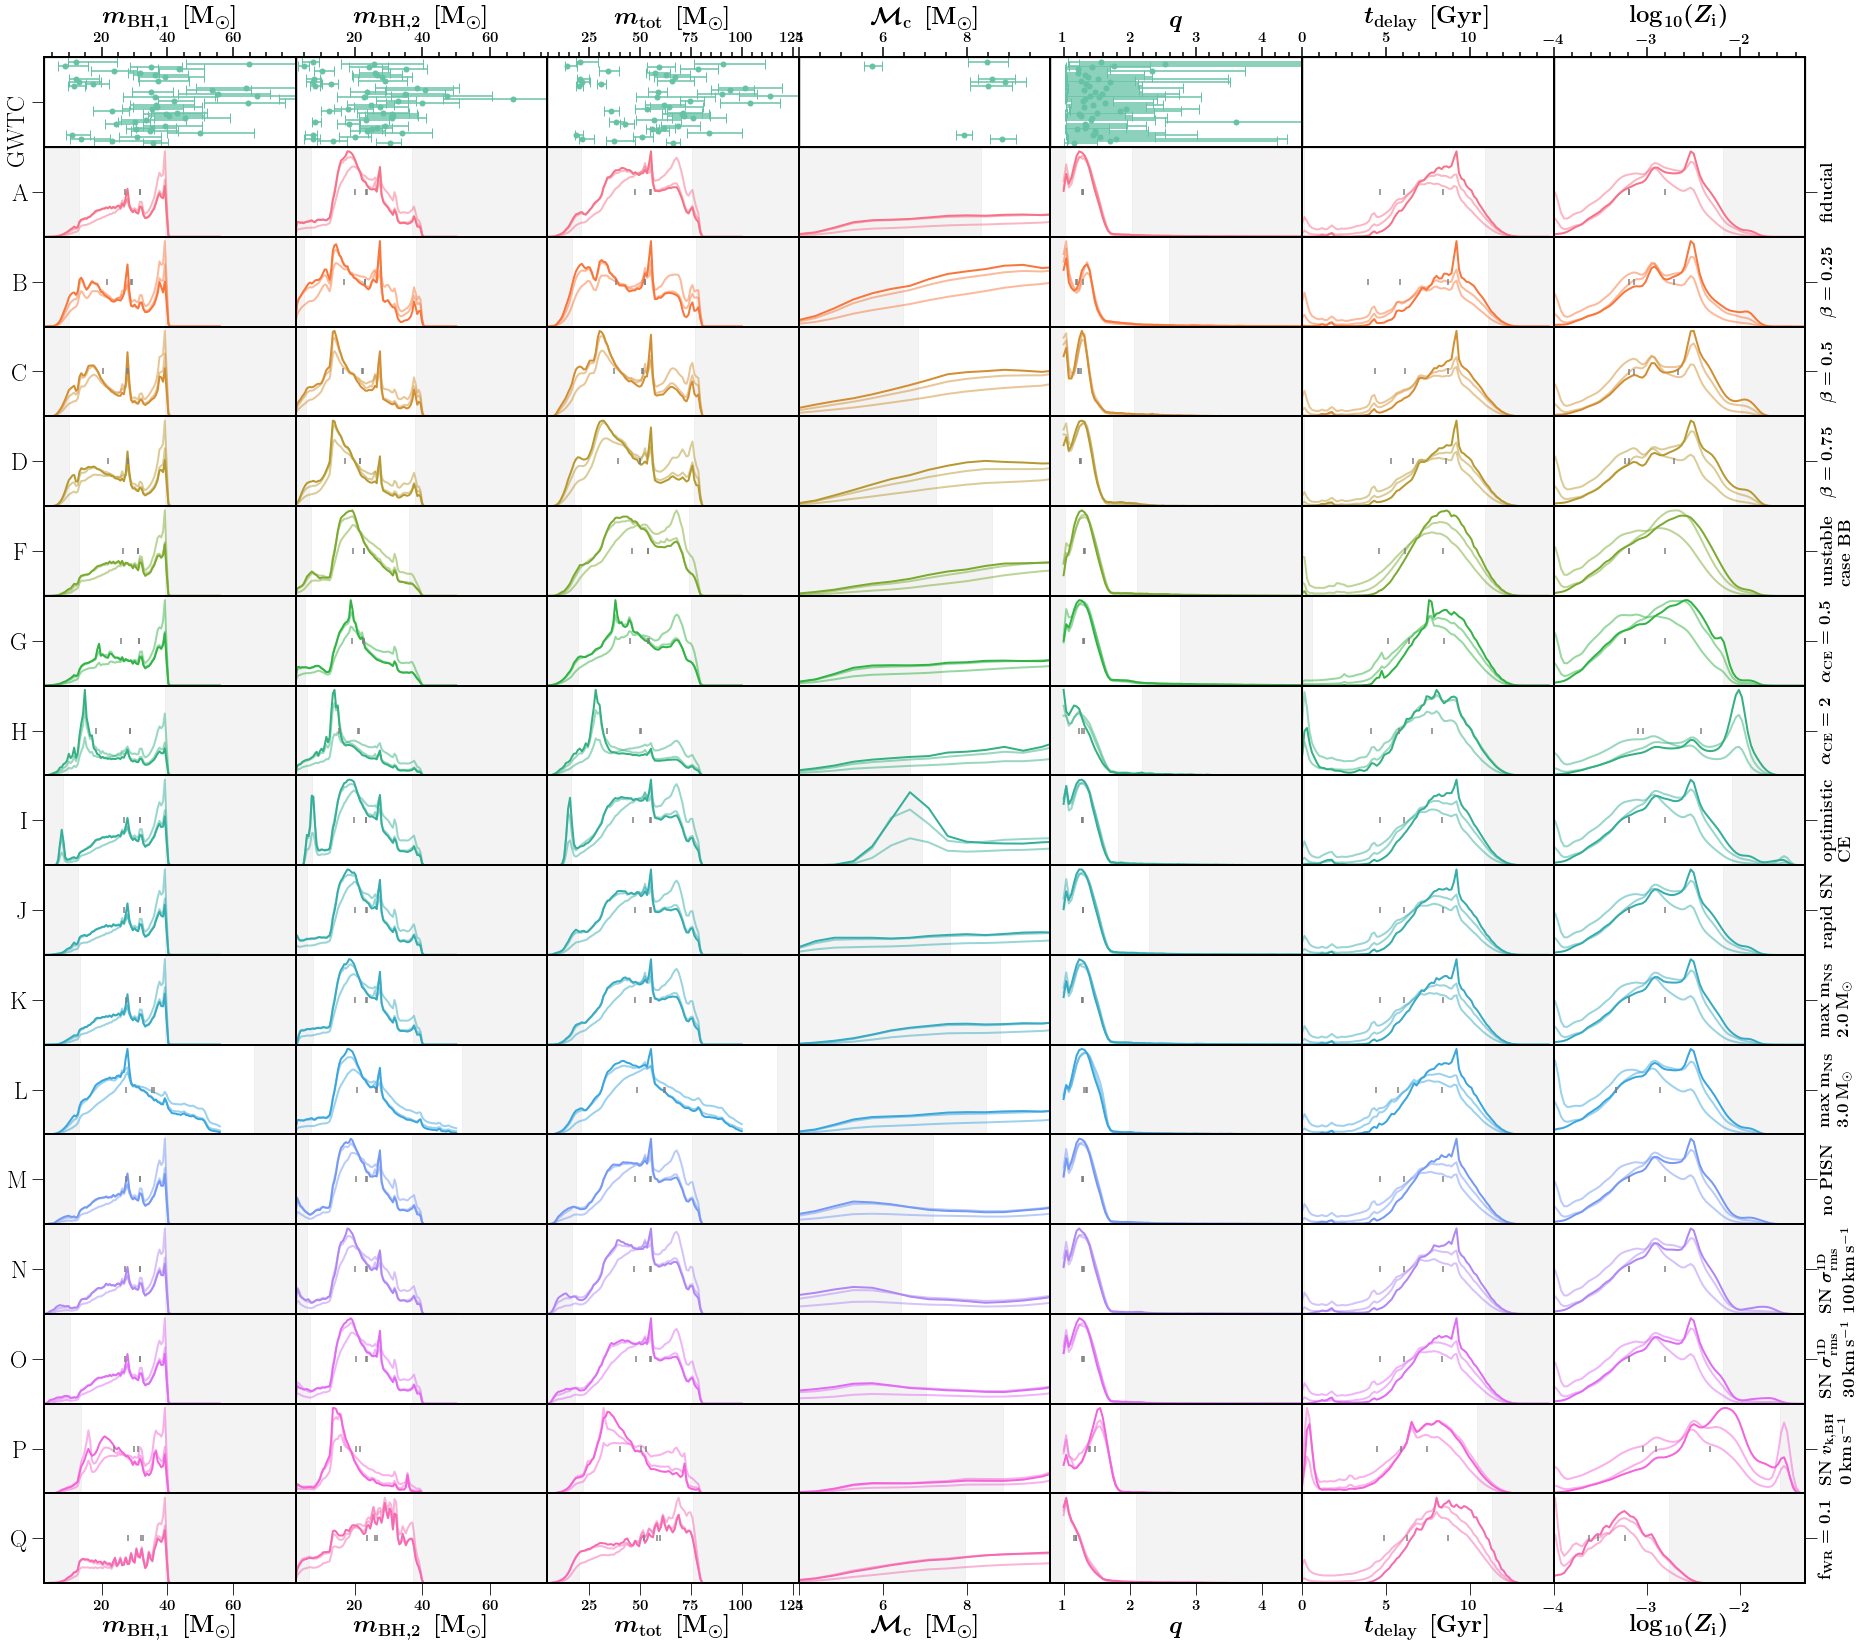

In [52]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'



ncols, nrows= 7,17
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})




MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']


# without z=1 SFRD models:
MSSFRnameslist = ['000', '112', '212']#, '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']



TYPE = 'BBH'
nModels=17
BPSnameslist = list(string.ascii_uppercase)[0:nModels]

# I do NOT want model E 
if 'E' in BPSnameslist:
    BPSnameslist.remove('E')
print(BPSnameslist)





handles, labels = None, None
# BPSlist = [BPS]
whichWeight='det'

nameX = r'  - '
nameY = r' $m_{\rm{BH,1}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='Mass1'
_,_=makeKDEfigure(axe_ind=0,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.5,56], xlabel=nameX, ylabel=nameY, \
                                          xlim=[2.5,79], ylim=[0.0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)#, whichBPScolor=whichBPScolor) 


nameY = r' $m_{\rm{BH,2}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='Mass2'
_,_=makeKDEfigure(axe_ind=1,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.5,50], xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,76.9], ylim=[0.,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)#, whichBPScolor=whichBPScolor)     

#     nameX = r'${\rm{d}}P / {\rm{d}}  m_{\rm{tot}}  $'
nameY = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mtot'
_,_=makeKDEfigure(axe_ind=2,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[4,100], xlabel=nameX, ylabel=nameY, \
                              xlim=[4.4,128], ylim=[0.0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)#, whichBPScolor=whichBPScolor, quantiles=True) 


#     nameX = r'${\rm{d}}P / {\rm{d}} {M}_{\rm{c}}  $'
nameY = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mchirp'
_,_=makeKDEfigure(axe_ind=3, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[3.5, 48], xlabel=nameX, ylabel=nameY, \
                              xlim=[4, 9.99], ylim=[0.0,None],  whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 


#     nameX = r'${\rm{d}}P / {\rm{d}} q  $'
nameY = r' $q$ $ \, $'
xparam='q'
_,_=makeKDEfigure(axe_ind=4, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 4.9], xlabel=nameX, ylabel=nameY, \
                              xlim=[0.8, 4.6], ylim=[0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)     


nameY = r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
xparam='tdelay'
_,_=makeKDEfigure(axe_ind=5, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0,14.7], xlabel=nameX, ylabel=nameY, \
                              xlim=[0,14.99], ylim=[0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)      





nameY = r' $\log_{10}(Z_{\rm{i}})$ $ \, $'
xparam='logZ'
xmin = np.log10(0.0001)
xmax = np.log10(0.0499)
_,_=makeKDEfigure(axe_ind=6,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[xmin-0.5,xmax], xlabel=nameX, ylabel=nameY, \
                              xlim=[xmin,xmax], ylim=[0.001,None],  whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig('./KDEplot_' + whichWeight +'_'  + TYPE+ '.png', transparent=False)
plt.show()
plt.close()










# Without the 90% distribution quantiles 

In [ ]:
# def makeKDEfigure(axe_ind=None, xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=['000'], DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
#                               xlim=[1,30], ylim=[0, None], whichWeight='det', path_dir='/Volumes/Andromeda/DATA/AllDCO_bugfix/'):
    
    
#     """ 
#     plot total mass distribution with channels 
#     input:
    
#     axe = the axis to plot it on
#     xvar= the array of data that you want to plot the kde of
#     bw_method = bandwith method of the kernel density function you want to use (see class gaussian_kde())
#     xvarrange, the x-axis range to use for the kde [should be typically slightly larger than the range of xvar]
#     xlabel, ylabel = x and y labels of the plot
#     xlim, ylim = xlim and ylim of the plot axis 
#     """
    
#     # constants
#     Zsolar=0.0142
#     lw = 2

#     MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
 
    
#     if DCOtype=='BHNS':
#         DCOname='BHNS'
#     elif DCOtype=='BBH':
#         DCOname='BHBH'
#     elif DCOtype=='BNS':
#         DCOname='NSNS'


    
#     minq0_05 = 100
# #     minq0_25 =100
# #     maxq0_75 = -10
#     maxq0_95 = -10
        


#     for ind_m, BPSmodelName in enumerate(BPSmodelNames):
        
#         axe = ax[ind_m,axe_ind,]
        
#         if ind_m==0:
#             print('now at m=', BPSmodelName)

        


#         # data for KDE / PDF:
#         path_ = path_dir + alphabetDirDict[BPSmodelName] +'/'
#         path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'   

#         fdata = h5.File(path)

            
            
#         if xparam in ['MBH', 'MNS', 'q', 'Mchirp', 'Mtot']:

#             # obtain BH and NS masses
#             xvar1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
#             xvar2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
#             M1, M2 = obtainM1BHandM2BHassymetric(m1=xvar1, m2=xvar2) # M1 will be the most massive, M2 the least massive compact object. 
#             if xparam =='Mtot':
#                 xvar=M1+M2
#             elif xparam=='MBH':
#                 xvar = M1
#             elif xparam=='MNS':
#                 xvar = M2 
#             elif xparam =='q':
#                 xvar = M1/M2
#             elif xparam=='Mchirp':
#                 xvar = chirpmass(M1,M2)

#             del M1
#             del M2
#             del xvar1
#             del xvar2

#         elif xparam=='logZ':
#             ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
#             xvar = np.log10((ZZ))
#             del ZZ 
            
#         elif xparam=='Z':
#             ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
#             xvar = ((ZZ))
#             del ZZ

            
#         elif xparam=='tc':
#             tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
#             xvar = tc / 1000. # in Gyr. 
#             del tc

#         elif xparam=='tdelay':
#             tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
#             tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
#             xvar = (tc/1000) + (tform / 1000) # in Gyr 
#             del tc 
#             del tform
#         else:
#             print('KeyError')
            
#         label = None


#         BPScolor = colorDirDict[BPSmodelName]
            
            
#         ymax=0
#         ii=0
#         print(MSSFRmodelNames)
#         for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):
#             # read in MSSFR weights: 
#             if whichWeight=='det':
#                 # get detected weights
#                 fparam_key = 'weights_detected'
#             elif whichWeight=='z0':
#                 # get intrinsic weights
#                 fparam_key = 'weights_intrinsic'

#             weightheader = 'w_' + mssfr
#             w = fdata[fparam_key][weightheader][...].squeeze()

#             # highlight the SFRD if they are one of the following 3
#             if mssfr in ['000', '231', '312']:
#                 MSSFRalpha=1
#                 if mssfr=='000':
#                     MSSFRzorder = 57
#                     MSSFRlinestyle = MSSFRlinestyles[0]                    
#                 elif mssfr=='231':
#                     MSSFRzorder=55
#                     MSSFRlinestyle = MSSFRlinestyles[1]
#                 elif mssfr=='312':
#                     MSSFRzorder=54
#                     MSSFRlinestyle = MSSFRlinestyles[2]
#             else:
#                 MSSFRalpha=0.5
#                 MSSFRlinestyle = '-'
#                 MSSFRzorder=51   
                
#             BPScolor = colorDirDict[BPSmodelName]



    
    
#             # make the KDE, by calculating KDE values for the following x points 
#             xx_boot = np.linspace(xvarrange[0],xvarrange[1],100)

#             # set bandwidth (dimensionless) based on the no of samples in the data. 
#             lenXvar = len(xvar)
#             if lenXvar<=100000:
#                 bw=0.1
#             elif lenXvar>2*10**6:
#                 bw = 0.04
#             elif (lenXvar<=2*10**6) & (lenXvar>10**6):
#                 bw = 0.04
#             elif (lenXvar<=10**6) & (lenXvar>5*10**5):
#                 bw = 0.05 
#             elif (lenXvar<=5*10**5) & (lenXvar>10**5):
#                 bw = 0.06
#             else:
#                 print('error!! bw not defined')
            
#             # for metallicity we want a seperate, larger KDE bandwidth, since here the resolution is limited by our no of Zi grid points
#             if xparam=='logZ':
#                 bw = 0.1
#             if (mssfr=='000')&(axe_ind==0):
#                 print('Model ', BPSmodelName, 'with %s DCOs is given a kde bandwidth of '%len(xvar),  'bw=', bw)
                
#             KDE = gaussian_kde(xvar, weights=w, bw_method=bw)
#             yy_boot = KDE(xx_boot)


#             axe.plot(xx_boot, yy_boot, alpha=MSSFRalpha, color=BPScolor, zorder=MSSFRzorder, label=None,\
#                      linewidth=lw, linestyle=MSSFRlinestyle ) 

#             ymax = np.max(np.asarray([ymax,np.max(yy_boot)]))
#             ylim[1]=ymax*1.05    

       
                
                
#         fdata.close()

    
#         del xvar
#         del w

#         ax2y = axe.twinx()
#         ax2y.set_ylim(ylim[0], ylim[1])
#         # add label of model on the most left panels 
#         if xparam=='logZ':
#             center_x = (ylim[0] + (ylim[1]-ylim[0])/2)
#             ax2y.set_yticks([center_x])
#             ax2y.set_yticklabels([alphabetPhysicalNameDictWithEnter[BPSmodelName]], fontsize=fs-7, rotation=90, va='center') #rotation=55,
#         else: 
#             ax2y.set_yticks([])
#             for tick in ax2y.yaxis.get_major_ticks():
#                 tick.label.set_fontsize(0.1) 
                
                
                
#         ###########
#         fsyticks = 15
#         if xlim:
#             axe.set_xlim(xlim[0], xlim[1])
#         if ylim:
#             axe.set_ylim(ylim[0], ylim[1])
        
        
#         # add label of param plotted to bottom of panels
#         if BPSmodelName =='O':
#             axe.set_xlabel(ylabel, fontsize=fs)
#             axe.tick_params(labelsize=fsyticks)
            
#         else:
#             axe.set_xticklabels( () )
#             axe.set_xticks([])

#         axe.set_yticks([])
#         axe.set_yticklabels( () )



#         ########################
#         # SECOND Y-AXIS 
#         # add label of xparam and range on top on second axis 
#         ax2x = axe.twiny()
#         if BPSmodelName=='A':
#             ax2x.set_xlim(xlim[0], xlim[1])
#             ax2x.set_xlabel(ylabel, fontsize=fs)
#             ax2x.tick_params(labelsize=fsyticks)
#         else:
#             ax2x.set_xticklabels( () )
#             ax2x.set_xticks([])




#     #################
    
#         # add label of BPS model on extra axis on the right 
#         if xparam=='MBH':
#             center_x = (ylim[0] + (ylim[1]-ylim[0])/2)

#             axe.set_yticks([center_x])
#             axe.set_yticklabels([BPSmodelName],  fontsize=fs) #rotation=55,


    
#     return 0,0 






# BHNS  without 90% credible intervals

In [ ]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'






ncols, nrows= 7,14
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


# for ind_bps, BPS in enumerate(['A']):#, 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']):
# Zsolar=0.0142

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']


# MSSFRnameslist = ['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
# without z=1 SFRD models:
MSSFRnameslist = ['000', '112', '212'] #, '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']



TYPE = 'BHNS'
# nModels=15
# BPSnameslist = list(string.ascii_uppercase)[0:nModels]
# BPScolors       = sns.color_palette("husl", len(BPSnameslist))
# colorDirDict =  {BPSnameslist[i]: BPScolors[i] for i in range(len(BPSnameslist))}

# I do NOT want model E 
BPSnameslist.remove('E')
print(BPSnameslist)





handles, labels = None, None
# BPSlist = [BPS]
whichWeight='det'

nameX = r'  a'
nameY = r' $m_{\rm{BH}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='MBH'
_,_=makeKDEfigure(axe_ind=0,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.2,26], xlabel=nameX, ylabel=nameY, \
                                          xlim=[2.5,25.999], ylim=[0.0,None], whichWeight=whichWeight,  path_dir=path_dir)#, whichBPScolor=whichBPScolor) 

nameX = r'$-  $'
nameY = r' $m_{\rm{NS}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='MNS'
_,_=makeKDEfigure(axe_ind=1,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,3], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,3.], ylim=[0.,None], whichWeight=whichWeight,  path_dir=path_dir)#, whichBPScolor=whichBPScolor)     

#     nameX = r'${\rm{d}}P / {\rm{d}}  m_{\rm{tot}}  $'
nameY = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mtot'
_,_=makeKDEfigure(axe_ind=2,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.2,28], xlabel=nameX, ylabel=nameY, \
                              xlim=[2.501,27.9999], ylim=[0.0,None], whichWeight=whichWeight,  path_dir=path_dir)#, whichBPScolor=whichBPScolor) 


#     nameX = r'${\rm{d}}P / {\rm{d}} {M}_{\rm{c}}  $'
nameY = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mchirp'
_,_=makeKDEfigure(axe_ind=3, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 7], xlabel=nameX, ylabel=nameY, \
                              xlim=[1.01,6.999], ylim=[0.0,None],  whichWeight=whichWeight,  path_dir=path_dir) 


#     nameX = r'${\rm{d}}P / {\rm{d}} q  $'
nameY = r' $q$ $ \, $'
xparam='q'
_,_=makeKDEfigure(axe_ind=4, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,15], xlabel=nameX, ylabel=nameY, \
                              xlim=[1.00,14.999], ylim=[0,None], whichWeight=whichWeight,  path_dir=path_dir)     


nameY = r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
xparam='tdelay'
_,_=makeKDEfigure(axe_ind=5, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0,15], xlabel=nameX, ylabel=nameY, \
                              xlim=[0,14.99], ylim=[0,None], whichWeight=whichWeight,  path_dir=path_dir)      





nameY = r' $\log_{10}(Z_{\rm{i}})$ $ \, $'
xparam='logZ'
xmin = np.log10(0.0001)
xmax = np.log10(0.0499)
_,_=makeKDEfigure(axe_ind=6,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[xmin-0.5,xmax], xlabel=nameX, ylabel=nameY, \
                              xlim=[xmin,xmax], ylim=[0.001,None],  whichWeight=whichWeight,  path_dir=path_dir) 


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig('./KDEplot_' + whichWeight +'_'  + TYPE+ '.png', transparent=False)
plt.show()
plt.close()










In [ ]:
# PLOT ONE 

In [27]:
# def makeKDEfigure_log(axe_ind=None, xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=['000'], DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
#                               xlim=[1,30], ylim=[0, None], whichWeight='det', path_dir='/Volumes/Andromeda/DATA/AllDCO_bugfix/', quantiles=False,\
#                   pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'):
    
    
#     """ 
#     plot total mass distribution with channels 
#     input:
    
#     axe = the axis to plot it on
#     xvar= the array of data that you want to plot the kde of
#     bw_method = bandwith method of the kernel density function you want to use (see class gaussian_kde())
#     xvarrange, the x-axis range to use for the kde [should be typically slightly larger than the range of xvar]
#     xlabel, ylabel = x and y labels of the plot
#     xlim, ylim = xlim and ylim of the plot axis 
#     """
    
#     # constants
#     Zsolar=0.0142
#     lw = 2

#     # start of min and max quantiles. 

    
    
#     MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
 

#     DCOname_dict = {'BHNS':'BHNS', 'BBH':'BHBH', 'BNS':'NSNS'}
#     DCOname = DCOname_dict[DCOtype]
# #     xvarHeaders = ['Mass1', 'Mass2', 'tc',\
# #                'log10(tc)', 'TotMass', 'ChirpMass', 'q', 'metallicitySystems', 'log10metallicitySystems', 'tdelay',\
# #                'log10(tdelay)']
#     xvar_dict = {'Mtot':4,'Mass1':0, 'Mass2':1, 'q':6, 'Mchirp':5, 'logZ':8, 'Z':7, 'tc':2, 'log10(tc)':3, 'tdelay':9, 'log10(tdelay)':10 }

        


# #     for ind_m, BPSmodelName in enumerate(BPSmodelNames[0:2]):
#     for ind_m, BPSmodelName in enumerate(BPSmodelNames):
#         minq0_05 = 100
#         maxq0_95 = -100
        
#         axe = ax[ind_m+1,axe_ind]
        
        
        
#         if ind_m==0:
#             print('now at m=', BPSmodelName)

        
#         # distribution quantiles/percentiles:
#         dfname =  pathQuantiles + 'distribution_percentiles_model_' + DCOtype  + '_' + BPSmodelName + '.csv' 
#         df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])
        

#         # data for KDE / PDF:
#         path_ = path_dir + alphabetDirDict[BPSmodelName] +'/'
#         path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'   

#         fdata = h5.File(path)

            
            
#         if xparam in ['Mass1', 'Mass2', 'q', 'Mchirp', 'Mtot']:

#             # obtain BH and NS masses
#             xvar1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
#             xvar2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
#             M1, M2 = obtainM1BHandM2BHassymetric(m1=xvar1, m2=xvar2) # M1 will be the most massive, M2 the least massive compact object. 
#             del xvar1
#             del xvar2
#             if xparam =='Mtot':
#                 xvar=M1+M2
#             elif xparam=='Mass1':
#                 xvar = M1
#             elif xparam=='Mass2':
#                 xvar = M2 
#             elif xparam =='q':
#                 xvar = M1/M2
#             elif xparam=='Mchirp':
#                 xvar = chirpmass(M1,M2)

#             del M1
#             del M2


#         elif xparam=='logZ':
#             ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
#             xvar = np.log10((ZZ))
#             del ZZ 
            
#         elif xparam=='Z':
#             ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
#             xvar = ((ZZ))
#             del ZZ

            
#         elif xparam=='tc':
#             tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
#             xvar = tc / 1000. # in Gyr. 
#             del tc

#         elif xparam=='tdelay':
#             tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
#             tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
#             xvar = (tc/1000) + (tform / 1000) # in Gyr 
#             del tc 
#             del tform
#         else:
#             print('KeyError')
        
#         # index in the quantiles.csv file of the parameter
#         xvarind = xvar_dict[xparam]
#         ind_max = 28 + xvarind*28
#         ind_min = xvarind*28
        
#         label = None


#         BPScolor = colorDirDict[BPSmodelName]
            
            
#         ymax=0
#         ii=0
#         print(MSSFRmodelNames)
#         for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):
#             # read in MSSFR weights: 
#             if whichWeight=='det':
#                 # get detected weights
#                 fparam_key = 'weights_detected'
#             elif whichWeight=='z0':
#                 # get intrinsic weights
#                 fparam_key = 'weights_intrinsic'

#             weightheader = 'w_' + mssfr
#             w = fdata[fparam_key][weightheader][...].squeeze()

#             # highlight the SFRD if they are one of the following 3
#             if mssfr in ['000', '231', '312']:
#                 MSSFRalpha=1
#                 if mssfr=='000':
#                     MSSFRzorder = 57
#                     MSSFRlinestyle = MSSFRlinestyles[0]                    
#                 elif mssfr=='231':
#                     MSSFRzorder=55
#                     MSSFRlinestyle = MSSFRlinestyles[1]
#                 elif mssfr=='312':
#                     MSSFRzorder=54
#                     MSSFRlinestyle = MSSFRlinestyles[2]
#             else:
#                 MSSFRalpha=0.5
#                 MSSFRlinestyle = '-'
#                 MSSFRzorder=51   
                
#             BPScolor = colorDirDict[BPSmodelName]



    
    
#             # make the KDE, by calculating KDE values for the following x points 
#             xx_boot = np.linspace(xvarrange[0],xvarrange[1],100)

#             # set bandwidth (dimensionless) based on the no of samples in the data. 
#             lenXvar = len(xvar)
#             if lenXvar<=100000:
#                 bw=0.1
#             elif lenXvar>2*10**6:
#                 bw = 0.04
#             elif (lenXvar<=2*10**6) & (lenXvar>10**6):
#                 bw = 0.04
#             elif (lenXvar<=10**6) & (lenXvar>5*10**5):
#                 bw = 0.05 
#             elif (lenXvar<=5*10**5) & (lenXvar>10**5):
#                 bw = 0.06
#             else:
#                 print('error!! bw not defined')
# #             bw = 4# TEMP 
            
#             # for metallicity we want a seperate, larger KDE bandwidth, since here the resolution is limited by our no of Zi grid points
#             if xparam=='logZ':
#                 bw = 0.1
#             if (mssfr=='000')&(axe_ind==0):
#                 print('Model ', BPSmodelName, 'with %s DCOs is given a kde bandwidth of '%len(xvar),  'bw=', bw)
                
#             KDE = gaussian_kde(xvar, weights=w, bw_method=bw)
#             yy_boot = KDE(xx_boot)
#             del KDE 

#             axe.plot(xx_boot, yy_boot, alpha=MSSFRalpha, color=BPScolor, zorder=MSSFRzorder, label=None,\
#                      linewidth=lw, linestyle=MSSFRlinestyle ) 

#             ymax = np.max(np.asarray([ymax,np.max(yy_boot)]))
#             ylim[1]=ymax*1.05 
            
            
            
#             q0_05 = (df.iloc[1][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[mssfr]]
#             q0_5 = (df.iloc[4][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[mssfr]]
#             q0_95 = (df.iloc[7][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[mssfr]]
            

#             minq0_05 = np.min([minq0_05, q0_05])
#             maxq0_95 = np.max([maxq0_95, q0_95])

            


                
#         fdata.close()
# #         # if at the last one, do the overall gray areas for max & min quantiles
# #         if (quantiles==True): 
# #             print('bpsnms = ', BPSmodelNames)
# #             xx = np.linspace(ylim[0], ylim[1]*100, 2)
# #             for ind_, bps in enumerate(BPSmodelNames):
# #                 ax[axe_ind,ind_].fill_between([xlim[0], minq0_05],  y1=[0,0], y2=[ylim[1], ylim[1]],   color='lightgray', zorder=0 , alpha =0.25 )
# #                 ax[axe_ind,ind_].fill_between([maxq0_95, xlim[1]] ,  y1=[0,0], y2=[ylim[1], ylim[1]],   color='lightgray', zorder=0 , alpha =0.25 )
        
    
#         if quantiles==True:
#             for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):    
#                 # plot median with scatter point 
#                 q0_5 = (df.iloc[4][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[mssfr]]
#                 if quantiles==True:
#                     axe.scatter(q0_5, 0.50*ylim[1],  \
#                                 c='gray', s=30, label=None, \
#                                 marker='|', zorder=500)  
#                     # quantiles per BPS model 
    
#         if quantiles==True:
# #             xx = np.linspace(ylim[0], ylim[1]*100, 2)
# #             for ind_, bps in enumerate(BPSmodelNames):
#             axe.fill_between([xlim[0]-100, minq0_05],  y1=[0,0], y2=[ylim[1]*10, ylim[1]*10],   color='lightgray', zorder=0 , alpha =0.25 )
#             axe.fill_between([maxq0_95, xlim[1]+100] ,  y1=[0,0], y2=[ylim[1]*10, ylim[1]*10],   color='lightgray', zorder=0 , alpha =0.25 )

                
    
#         del xvar
#         del w

        
        
        
        
#         ax2y = axe.twinx()
#         ax2y.set_ylim(ylim[0], ylim[1])
#         # add label of model on the most left panels 
#         if xparam=='logZ':
#             center_x = (ylim[0] + (ylim[1]-ylim[0])/2)
#             ax2y.set_yticks([center_x])
#             ax2y.set_yticklabels([alphabetPhysicalNameDictWithEnter[BPSmodelName]], fontsize=fs-7, rotation=90, va='center') #rotation=55,
#         else: 
#             ax2y.set_yticks([])
#             for tick in ax2y.yaxis.get_major_ticks():
#                 tick.label.set_fontsize(0.1) 
                
                
                
#         ###########
#         fsyticks = 15
#         if xlim:
#             axe.set_xlim(xlim[0], xlim[1])
#         if ylim:
#             axe.set_ylim(ylim[0], ylim[1])
        
        
#         # add label of param plotted to bottom of panels # in ['Q']
#         if BPSmodelName==BPSmodelNames[-1]: 
#             axe.set_xlabel(ylabel, fontsize=fs)
#             axe.tick_params(labelsize=fsyticks)
            
#         else:
#             axe.set_xticklabels( () )
#             axe.set_xticks([])

#         axe.set_yticks([])
#         axe.set_yticklabels( () )



# #         ########################
# #         # SECOND Y-AXIS 
# #         # add label of xparam and range on top on second axis 
# #         ax2x = axe.twiny()
# #         if BPSmodelName=='A':
# #             ax2x.set_xlim(xlim[0], xlim[1])
# #             ax2x.set_xlabel(ylabel, fontsize=fs)
# #             ax2x.tick_params(labelsize=fsyticks)
# #         else:
# #             ax2x.set_xticklabels( () )
# #             ax2x.set_xticks([])




#     #################
    
#         # add label of BPS model on extra axis on the right 
#         if xparam=='Mass1':
#             center_x = (ylim[0] + (ylim[1]-ylim[0])/2)

#             axe.set_yticks([center_x])
#             axe.set_yticklabels([BPSmodelName],  fontsize=fs) #rotation=55,

            
            
            
            
#     ############################
#     ##### ADD OBSERVATIONS  ####
#     ############################
#     axe = ax[0, axe_ind]
#     ########################
#     # SECOND Y-AXIS 
#     # add label of xparam and range on top on second axis 
#     ax2x = axe.twiny()
# #     if BPSmodelName=='A':
#     ax2x.set_xlim(xlim[0], xlim[1])
#     ax2x.set_xlabel(ylabel, fontsize=fs)
#     ax2x.tick_params(labelsize=fsyticks)
#     layoutAxesNoXlabel(ax=ax2x)
# #     layoutAxesNoXlabel
# #     else:
# #         ax2x.set_xticklabels( () )
# #         ax2x.set_xticks([])    

        
#     #######################
#     # Plot GWTC data 
    
    
#     # SHOW GWTC-1 and GWTC-2 results:
#     if xvarind in [0,1,4,5,6]:

#         if xvarind==0:
#             ind_GWTC = 0 # M1 [Msun]
#         elif xvarind==1:
#             ind_GWTC = 1 # M2 [Msun]
#         elif xvarind==4:
#             ind_GWTC = 2 # Mtot [Msun]
#         elif xvarind==5:
#             ind_GWTC = 3 # Mchirp [Msun]
#         elif xvarind==6:
#             ind_GWTC = 4 # mass ratio q

        
        
# #         if DCOtype in ['BHBH', 'BHNS']:

        
#         if DCOtype=='BHNS':
#             color_GW_err = ['#fc8d62', '#8da0cb', '#66c2a5']
#             color_GW_sct = ['#fc8d62', '#8da0cb', '#66c2a5'] # reflect that they are most likely BNS, BHNS, BBH
#             dxloc_GW = [-0.4, -0.1, +0.25]
#             GWsGWTC = ['GW190425', 'GW190814', 'GW190426_152155']
#             GWnames = ['GW190425', 'GW190814', 'GW190426']  
            
# #         TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
# #         TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
                    
#         elif DCOtype=='NSNS':
#             color_GW_err = ['#fc8d62', '#fc8d62']
#             color_GW =  ['#fc8d62', '#fc8d62']
#             dxloc_GW = [-0.3, +0.1]
#             GWsGWTC  = ['GW170817', 'GW190425']
#             GWnames = ['GW170817', 'GW190425']
            

#         for ind_GW, GW_ in enumerate(GWsGWTC):
#             #        
# #             pathGWTC = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/GWTC_data/'
#             pathGWTC = '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/'
#             dfname = pathGWTC + 'CredibleIntervals_' + GW_  + '.csv' 
#             df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])


#             q0_05 = (df.iloc[0][ind_GWTC])
#             q0_5 = (df.iloc[1][ind_GWTC])
#             q0_95 = (df.iloc[2][ind_GWTC])


#             yplus0_9 = q0_95 -q0_5
#             ymin0_9  = q0_5-q0_05
#             xxx=0
#             print(GW_, ' = ', q0_5 , '+/-', yplus0_9, ymin0_9 )
            
#             # plot for BHNS and NSNS only the median with 90% confidence interval as errorbars
#             erb = axe.errorbar(y=xxx+0.5+dxloc_GW[ind_GW], x=q0_5, xerr=np.transpose([[ymin0_9, yplus0_9]]), fmt='o', capsize=5, ecolor=color_GW_err[ind_GW], ms=5,  mec=color_GW_sct[ind_GW], mfc=color_GW_sct[ind_GW], zorder=1E6)
#             if DCOtype=='BHNS':
#                 erb[-1][0].set_linestyle('-.')
#             if xvarind==0:
                
#                 if GW_=='GW190425':
#                     xtext = q0_5 + 5.1
#                 elif GW_=='GW190814':
#                     xtext = q0_5 -.25
#                 else:
#                     xtext = q0_5 -0.05
                
#                 axe.text(y=xxx+0.54+dxloc_GW[ind_GW], x=xtext, s=GWnames[ind_GW], color=color_GW_err[ind_GW], ha='center', va='bottom', rotation=0, zorder=1E7, fontsize=15)

#     axe.set_yticks([])
#     axe.set_yticklabels( () )    
#     axe.set_xlim(xlim[0], xlim[1])
#     axe.set_ylim(0,1)
    
    
#     axe.set_xscale('log')
#     axe.set_yscale('log')
    

#     if xparam=='Mass1':
#         center_x = 0.5

#         axe.set_yticks([center_x])
#         axe.set_yticklabels(['GWTC'],  fontsize=fs) #rotation=55,    
    
    
#     return 0,0 






now at m= I
['000']
Model  I with 7463923 DCOs is given a kde bandwidth of  bw= 0.04
['000']
Model  J with 8879317 DCOs is given a kde bandwidth of  bw= 0.04


UnboundLocalError: local variable 'GWsGWTC' referenced before assignment

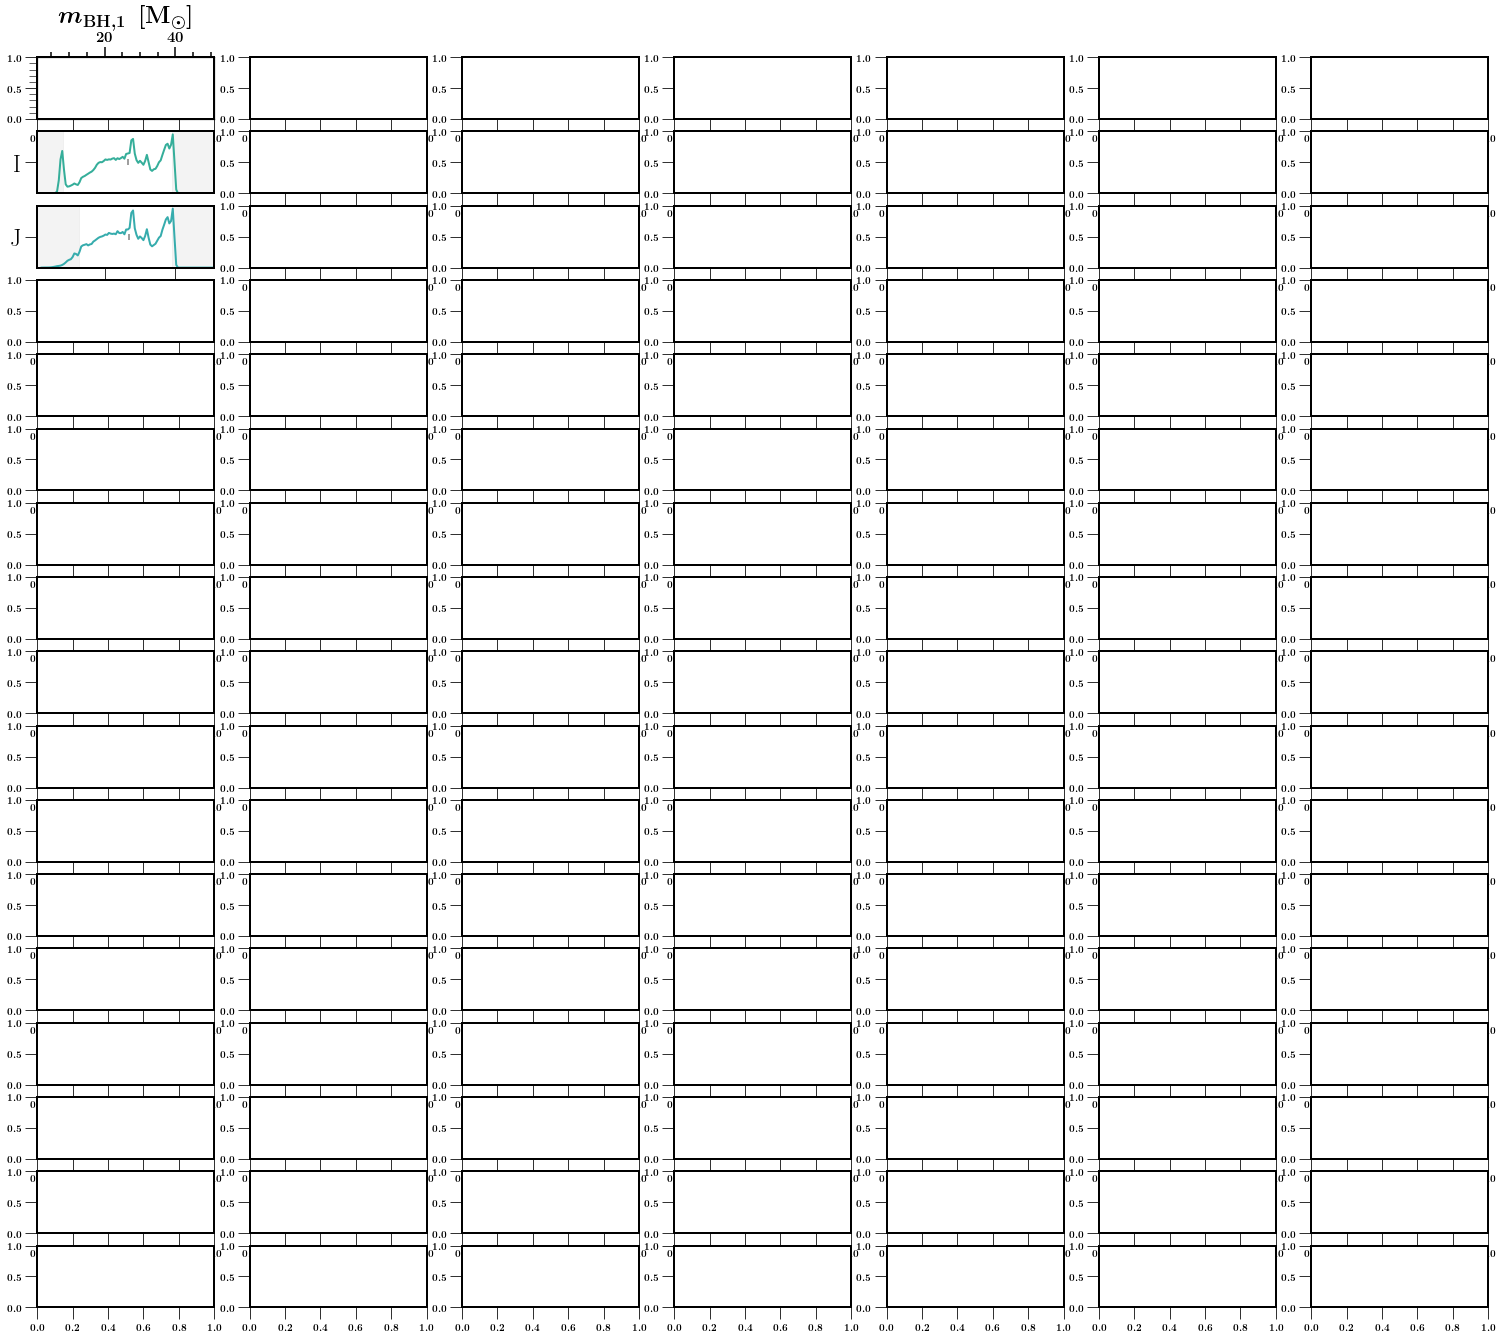

In [22]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'






ncols, nrows= 7,17
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


# for ind_bps, BPS in enumerate(['A']):#, 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']):
# Zsolar=0.0142

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']


# MSSFRnameslist = ['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
# without z=1 SFRD models:
# MSSFRnameslist = ['000']#, '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
MSSFRnameslist = ['000'] #, '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']



TYPE = 'BBH'
# nModels=15
# BPSnameslist = list(string.ascii_uppercase)[0:nModels]
# BPScolors       = sns.color_palette("husl", len(BPSnameslist))
# colorDirDict =  {BPSnameslist[i]: BPScolors[i] for i in range(len(BPSnameslist))}

# I do NOT want model E 
BPSnameslist =['I', 'J']



handles, labels = None, None
# BPSlist = [BPS]
whichWeight='det'

nameX = r'  a'
nameY = r' $m_{\rm{BH,1}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='Mass1'
_,_=makeKDEfigure_log(axe_ind=0,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.2,50.5], xlabel=nameX, ylabel=nameY, \
                                          xlim=[1.02,50.999], ylim=[0.0,None], whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)#, whichBPScolor=whichBPScolor) 




plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig('./KDEplot_' + whichWeight +'_'  + TYPE+ 'temp.png', transparent=False)
plt.show()
plt.close()










In [ ]:

ncols, nrows= 7,16
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.show()

In [ ]:
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]

print(BPSnameslist)
BPSnameslist.remove('E')
print(BPSnameslist)